In [1]:
PATH='/home/kirana/Documents/phd/exp3_autoencoder'
DATAPATH='/home/kirana/Documents/final_dissertation_final/experiments/datasets/ml-1m'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn

In [3]:
[df, df_train,df_valid,df,df_ratings,idx_to_user,\
             idx_to_movie,movie_to_idx,user_to_idx]=pickle.load(open(f'{DATAPATH}/reads.pkl','rb'))

In [4]:
df.shape

(1000209, 20)

In [5]:
df.head()

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid,gender_idx,age_idx,title_idx,genre_idx,zip_idx
648724,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,train,1,1,1,0,1,1,1,1,1
203881,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,train,2,2,1,0,2,2,2,2,2
243394,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,train,3,3,1,0,1,1,3,3,3
788507,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,train,4,4,1,0,1,3,4,4,4
301066,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,train,5,5,1,0,1,4,5,5,5


In [6]:
df_train=df.loc[df['random_dstype']=='train']
df_valid=df.loc[df['random_dstype']!='train']

In [7]:
df_train.head().T

,648724,203881,243394,788507,301066
userId,3908,1254,1467,4717,1789
itemId,2347,1541,2617,3754,2997
rating,4,2,3,3,5
timestamp,965941231,974823280,977173059,963502544,974700402
gender,M,F,M,M,M
age,25,18,25,45,1
occupation,0,1,5,17,10
zip,10021,02144,97007,48310,19116
title,"Pope of Greenwich Village, The (1984)",Addicted to Love (1997),"Mummy, The (1999)","Adventures of Rocky and Bullwinkle, The (2000)",Being John Malkovich (1999)
genre,Action,Comedy|Romance,Action|Adventure|Horror|Thriller,Animation|Children's|Comedy,Comedy


In [8]:
df_train.shape,df_valid.shape

((900188, 20), (100021, 20))

### Add the autoencoder features

In [9]:
import pickle

In [10]:
[df_train_user_autoenc,df_valid_user_autoenc,user_mtx_1_weights,user_mtx_2_weights]=\
    pickle.load(open(f'{DATAPATH}/inter/user_autoenc_weights.pkl','rb'))

In [11]:
[df_train_item_autoenc, df_valid_item_autoenc,item_mtx_1_weights,item_mtx_2_weights]=\
    pickle.load(open(f'{DATAPATH}/inter/item_autoenc_weights.pkl','rb'))

In [12]:
df_train_user_autoenc.shape, type(df_train_user_autoenc),df_train_user_autoenc.head()

((6041, 11),
 pandas.core.frame.DataFrame,
    user_idx  user_autoenc0  user_autoenc1  user_autoenc2  user_autoenc3  \
 0         0      -0.671837       2.577009      -1.507589       0.332797   
 1         1      -0.809926      -0.483721       2.453740      -1.551907   
 2         2       1.254941      -2.131284       1.810311       0.597943   
 3         3      -3.206347      -0.449586       2.392539      -2.755247   
 4         4      -0.097608       1.857577      -2.348423       2.663222   
 
    user_autoenc4  user_autoenc5  user_autoenc6  user_autoenc7  user_autoenc8  \
 0      -1.139656      -1.726680      -1.184810      -0.325938       2.037823   
 1       3.453933      -0.869701       2.121841       3.970576      -1.076461   
 2       0.346018       2.327138       0.337492       0.072589      -2.992533   
 3       0.173469      -1.687047       4.412164       4.598782      -0.101633   
 4      -1.915509      -1.128552      -1.527104      -2.628924      -0.967917   
 
    user_au

In [13]:
df_valid_user_autoenc.shape, type(df_valid_user_autoenc),df_valid_user_autoenc.head()

((6041, 11),
 pandas.core.frame.DataFrame,
    user_idx  user_autoenc0  user_autoenc1  user_autoenc2  user_autoenc3  \
 0         0       1.443038       3.739923      -1.705728      -0.934832   
 1         1      -2.179663      -0.304209       2.231106      -2.690022   
 2         2      -1.197682       2.911296      -1.374013      -0.956890   
 3         3      -0.795275       1.550588       0.345821      -2.817803   
 4         4       2.792106       3.132009      -2.735980      -1.092634   
 
    user_autoenc4  user_autoenc5  user_autoenc6  user_autoenc7  user_autoenc8  \
 0      -2.361988      -0.164131      -2.501593       0.092132       4.284271   
 1       1.797029      -0.735618       3.405828       3.636310      -0.675551   
 2      -2.304279      -1.051586       0.005976      -0.470597       1.295456   
 3      -1.488546      -0.206169       1.536819       2.329327       1.548221   
 4      -3.802804       1.253022      -2.804603      -1.343972       3.890115   
 
    user_au

In [14]:
df_train_item_autoenc.shape, type(df_train_item_autoenc),df_train_item_autoenc.head()

((3707, 26),
 pandas.core.frame.DataFrame,
    item_idx  item_autoenc0  item_autoenc1  item_autoenc2  item_autoenc3  \
 0         0      -0.972387      -0.606349      -1.684785       3.331483   
 1         1       0.109613       2.493398       1.538485      -3.214294   
 2         2       2.546608      -0.385986      -2.767612      -0.812071   
 3         3      -1.314622       5.501726       1.575552      -5.851224   
 4         4      -1.303826      -2.574216      -4.260112       4.948697   
 
    item_autoenc4  item_autoenc5  item_autoenc6  item_autoenc7  item_autoenc8  \
 0      -4.366021       0.424214      -0.572584      -1.469266      -0.936130   
 1      -5.050033      -4.308205      -0.751286      -1.576796       3.761183   
 2      -1.934735      -4.304457      -1.387528      -1.374283       1.729323   
 3      -1.000455      -4.277728       2.578251      -2.228659       6.636960   
 4       1.262775       1.786267       0.612944      -1.522320      -4.641035   
 
    ...  it

In [15]:
df_valid_item_autoenc.shape, type(df_valid_item_autoenc),df_valid_item_autoenc.head()

((3707, 26),
 pandas.core.frame.DataFrame,
    item_idx  item_autoenc0  item_autoenc1  item_autoenc2  item_autoenc3  \
 0         0      -2.260203       3.249211       0.732744       0.672127   
 1         1      -1.437780       4.805419       2.360490      -3.502130   
 2         2       2.185920       2.270772      -1.313627      -0.561884   
 3         3      -1.766132       4.403568       1.506800      -2.777096   
 4         4      -0.824570      -2.970635      -3.598530       3.352428   
 
    item_autoenc4  item_autoenc5  item_autoenc6  item_autoenc7  item_autoenc8  \
 0      -6.091678      -0.611016       0.990156      -3.158490       1.314611   
 1      -5.824772      -4.784998       1.876775      -2.511013       4.959239   
 2      -3.195740      -3.176659      -2.118562      -1.412818       2.192565   
 3      -1.904963      -1.274057       1.787238      -2.549058       3.284896   
 4       0.860574      -0.284102       1.422206      -1.463916      -2.705498   
 
    ...  it

In [16]:
df_valid_user_autoenc.isnull().any()

user_idx         False
user_autoenc0    False
user_autoenc1    False
user_autoenc2    False
user_autoenc3    False
user_autoenc4    False
user_autoenc5    False
user_autoenc6    False
user_autoenc7    False
user_autoenc8    False
user_autoenc9    False
dtype: bool

In [17]:
df_valid.isnull().sum()

userId                 0
itemId                 0
rating                 0
timestamp              0
gender                 0
age                    0
occupation             0
zip                    0
title                  0
genre                  0
random_dstype          0
user_idx               0
item_idx               0
dstype_random_train    0
dstype_random_valid    0
gender_idx             0
age_idx                0
title_idx              0
genre_idx              0
zip_idx                0
dtype: int64

In [18]:
df_train.isnull().sum()

userId                 0
itemId                 0
rating                 0
timestamp              0
gender                 0
age                    0
occupation             0
zip                    0
title                  0
genre                  0
random_dstype          0
user_idx               0
item_idx               0
dstype_random_train    0
dstype_random_valid    0
gender_idx             0
age_idx                0
title_idx              0
genre_idx              0
zip_idx                0
dtype: int64

In [19]:
df_train.shape, df_valid.shape

((900188, 20), (100021, 20))

In [20]:
df_train.dtypes

userId                  int64
itemId                  int64
rating                  int64
timestamp               int64
gender                 object
age                     int64
occupation              int64
zip                    object
title                  object
genre                  object
random_dstype          object
user_idx                int64
item_idx                int64
dstype_random_train     int64
dstype_random_valid     int64
gender_idx              int64
age_idx                 int64
title_idx               int64
genre_idx               int64
zip_idx                 int64
dtype: object

In [21]:
df_train.head()

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid,gender_idx,age_idx,title_idx,genre_idx,zip_idx
648724,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,train,1,1,1,0,1,1,1,1,1
203881,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,train,2,2,1,0,2,2,2,2,2
243394,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,train,3,3,1,0,1,1,3,3,3
788507,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,train,4,4,1,0,1,3,4,4,4
301066,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,train,5,5,1,0,1,4,5,5,5


In [22]:
df_train=pd.merge(df_train,df_train_item_autoenc,on='item_idx',how='left')

In [23]:
df_train.shape

(900188, 45)

In [24]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_item_autoenc,on='item_idx',how='left')
df_valid.shape

(100021, 20)


(100021, 45)

In [25]:
df_valid.shape

(100021, 45)

In [26]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_user_autoenc,on='user_idx',how='left')
df_valid.shape

(100021, 45)


(100021, 55)

In [27]:
print(df_train.shape)
df_train=pd.merge(df_train,df_train_user_autoenc,on='user_idx',how='left')
df_train.shape

(900188, 45)


(900188, 55)

In [28]:
df_train.columns

Index(['userId', 'itemId', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genre', 'random_dstype', 'user_idx',
       'item_idx', 'dstype_random_train', 'dstype_random_valid', 'gender_idx',
       'age_idx', 'title_idx', 'genre_idx', 'zip_idx', 'item_autoenc0',
       'item_autoenc1', 'item_autoenc2', 'item_autoenc3', 'item_autoenc4',
       'item_autoenc5', 'item_autoenc6', 'item_autoenc7', 'item_autoenc8',
       'item_autoenc9', 'item_autoenc10', 'item_autoenc11', 'item_autoenc12',
       'item_autoenc13', 'item_autoenc14', 'item_autoenc15', 'item_autoenc16',
       'item_autoenc17', 'item_autoenc18', 'item_autoenc19', 'item_autoenc20',
       'item_autoenc21', 'item_autoenc22', 'item_autoenc23', 'item_autoenc24',
       'user_autoenc0', 'user_autoenc1', 'user_autoenc2', 'user_autoenc3',
       'user_autoenc4', 'user_autoenc5', 'user_autoenc6', 'user_autoenc7',
       'user_autoenc8', 'user_autoenc9'],
      dtype='object')

In [34]:
autoenc_cols=df_train.columns[df_train.columns.str.contains('autoenc')]

In [35]:
user_autoenc_cols=df_train.columns[df_train.columns.str.contains('user_autoenc')]
item_autoenc_cols=df_train.columns[df_train.columns.str.contains('item_autoenc')]

In [36]:
autoenc_cols, item_autoenc_cols,user_autoenc_cols

(Index(['item_autoenc0', 'item_autoenc1', 'item_autoenc2', 'item_autoenc3',
        'item_autoenc4', 'item_autoenc5', 'item_autoenc6', 'item_autoenc7',
        'item_autoenc8', 'item_autoenc9', 'item_autoenc10', 'item_autoenc11',
        'item_autoenc12', 'item_autoenc13', 'item_autoenc14', 'item_autoenc15',
        'item_autoenc16', 'item_autoenc17', 'item_autoenc18', 'item_autoenc19',
        'item_autoenc20', 'item_autoenc21', 'item_autoenc22', 'item_autoenc23',
        'item_autoenc24', 'user_autoenc0', 'user_autoenc1', 'user_autoenc2',
        'user_autoenc3', 'user_autoenc4', 'user_autoenc5', 'user_autoenc6',
        'user_autoenc7', 'user_autoenc8', 'user_autoenc9'],
       dtype='object'),
 Index(['item_autoenc0', 'item_autoenc1', 'item_autoenc2', 'item_autoenc3',
        'item_autoenc4', 'item_autoenc5', 'item_autoenc6', 'item_autoenc7',
        'item_autoenc8', 'item_autoenc9', 'item_autoenc10', 'item_autoenc11',
        'item_autoenc12', 'item_autoenc13', 'item_autoenc14', '

In [37]:
autoenc_cols=autoenc_cols.tolist()
item_autoenc_cols=item_autoenc_cols.tolist()
user_autoenc_cols=user_autoenc_cols.tolist()

In [38]:
df_train.head()

,userId,itemId,rating,timestamp,gender,age,occupation,zip,title,genre,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,3908,2347,4,965941231,M,25,0,10021,"Pope of Greenwich Village, The (1984)",Action,...,-0.809926,-0.483721,2.453740,-1.551907,3.453933,-0.869701,2.121841,3.970576,-1.076461,2.741880
1,1254,1541,2,974823280,F,18,1,02144,Addicted to Love (1997),Comedy|Romance,...,1.254941,-2.131284,1.810311,0.597943,0.346018,2.327138,0.337492,0.072589,-2.992533,-0.936141
2,1467,2617,3,977173059,M,25,5,97007,"Mummy, The (1999)",Action|Adventure|Horror|Thriller,...,-3.206347,-0.449586,2.392539,-2.755247,0.173469,-1.687047,4.412164,4.598782,-0.101633,1.518000
3,4717,3754,3,963502544,M,45,17,48310,"Adventures of Rocky and Bullwinkle, The (2000)",Animation|Children's|Comedy,...,-0.097608,1.857577,-2.348423,2.663222,-1.915509,-1.128552,-1.527104,-2.628924,-0.967917,-1.195479
4,1789,2997,5,974700402,M,1,10,19116,Being John Malkovich (1999),Comedy,...,-0.673590,0.183299,0.776998,0.922859,-0.916169,0.800552,-0.068556,0.458235,-0.755471,0.044356


In [39]:
df_train[['user_idx','item_idx']+autoenc_cols].head()

,user_idx,item_idx,item_autoenc0,item_autoenc1,item_autoenc2,item_autoenc3,item_autoenc4,item_autoenc5,item_autoenc6,item_autoenc7,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,1,1,0.109613,2.493398,1.538485,-3.214294,-5.050033,-4.308205,-0.751286,-1.576796,...,-0.809926,-0.483721,2.453740,-1.551907,3.453933,-0.869701,2.121841,3.970576,-1.076461,2.741880
1,2,2,2.546608,-0.385986,-2.767612,-0.812071,-1.934735,-4.304457,-1.387528,-1.374283,...,1.254941,-2.131284,1.810311,0.597943,0.346018,2.327138,0.337492,0.072589,-2.992533,-0.936141
2,3,3,-1.314622,5.501726,1.575552,-5.851224,-1.000455,-4.277728,2.578251,-2.228659,...,-3.206347,-0.449586,2.392539,-2.755247,0.173469,-1.687047,4.412164,4.598782,-0.101633,1.518000
3,4,4,-1.303826,-2.574216,-4.260112,4.948697,1.262775,1.786267,0.612944,-1.522320,...,-0.097608,1.857577,-2.348423,2.663222,-1.915509,-1.128552,-1.527104,-2.628924,-0.967917,-1.195479
4,5,5,2.273207,-0.567770,-3.191041,1.269062,-1.824770,-1.585689,-2.006722,-1.141187,...,-0.673590,0.183299,0.776998,0.922859,-0.916169,0.800552,-0.068556,0.458235,-0.755471,0.044356


In [40]:
df_valid['rating'].describe(),df_train['rating'].describe()

(count    100021.000000
 mean          3.584587
 std           1.114938
 min           1.000000
 25%           3.000000
 50%           4.000000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64, count    900188.000000
 mean          3.581229
 std           1.117342
 min           1.000000
 25%           3.000000
 50%           4.000000
 75%           4.000000
 max           5.000000
 Name: rating, dtype: float64)

In [41]:
df_train.columns

Index(['userId', 'itemId', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genre', 'random_dstype', 'user_idx',
       'item_idx', 'dstype_random_train', 'dstype_random_valid', 'gender_idx',
       'age_idx', 'title_idx', 'genre_idx', 'zip_idx', 'item_autoenc0',
       'item_autoenc1', 'item_autoenc2', 'item_autoenc3', 'item_autoenc4',
       'item_autoenc5', 'item_autoenc6', 'item_autoenc7', 'item_autoenc8',
       'item_autoenc9', 'item_autoenc10', 'item_autoenc11', 'item_autoenc12',
       'item_autoenc13', 'item_autoenc14', 'item_autoenc15', 'item_autoenc16',
       'item_autoenc17', 'item_autoenc18', 'item_autoenc19', 'item_autoenc20',
       'item_autoenc21', 'item_autoenc22', 'item_autoenc23', 'item_autoenc24',
       'user_autoenc0', 'user_autoenc1', 'user_autoenc2', 'user_autoenc3',
       'user_autoenc4', 'user_autoenc5', 'user_autoenc6', 'user_autoenc7',
       'user_autoenc8', 'user_autoenc9'],
      dtype='object')

In [42]:
emb_cols=['gender_idx','age_idx','title_idx','genre_idx','zip_idx']

In [43]:
[(col, df_train[col].nunique()) for col in emb_cols]

[('gender_idx', 2),
 ('age_idx', 7),
 ('title_idx', 3692),
 ('genre_idx', 301),
 ('zip_idx', 3439)]

In [44]:
[(col, min(50,df_train[col].nunique()//100)) for col in emb_cols]

[('gender_idx', 0),
 ('age_idx', 0),
 ('title_idx', 36),
 ('genre_idx', 3),
 ('zip_idx', 34)]

### Dataset and DataLoader

In [45]:
class cfdata (torch.utils.data.dataset.Dataset):
    def __init__(self,dfX,dfY,denseCols):
        self.dfX,self.dfY=dfX,dfY
        self.denseCols=denseCols
        
    def __len__ (self):
        return self.dfX.shape[0]
    
    def __getitem__ (self, idx):
        return torch.FloatTensor(self.dfX.iloc[idx].values),torch.FloatTensor([self.dfY.values[idx]])

In [47]:
dstrain=cfdata(df_train[['user_idx','item_idx']+autoenc_cols],df_train['rating'],autoenc_cols)
dsvalid=cfdata(df_valid[['user_idx','item_idx']+autoenc_cols],df_valid['rating'],autoenc_cols)

In [48]:
df_train.shape

(900188, 55)

In [49]:
bs=16

In [50]:
dltrain=DataLoader(dstrain,bs,True)

In [51]:
dlvalid=DataLoader(dsvalid,bs,True)

In [52]:
610/10, 9724/25

(61.0, 388.96)

In [53]:
len(user_to_idx),len(movie_to_idx)

(6040, 3706)

## Model Architecture

In [71]:
n_users=len(user_to_idx)
n_movies=len(movie_to_idx)
n_emb_user=75
n_emb_movie=50
min_rating=min(df_train['rating'])
max_rating=max(df_train['rating'])
dropout_e=0.1
hidden=[25,5,10,10]
dropouts=[0.2,0.3,0.3,0.2]

In [72]:
def hidden_layer(x,y,dropout,activation=nn.Sigmoid()):
    return nn.Sequential(
        nn.Linear(x, y),
        activation,
        nn.Dropout(p=dropout)
        )   

In [119]:
class cf(nn.Module):    
    def __init__(self,n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,user_autoenc_cols,\
                 item_autoenc_cols,dropout_e=0.01,hidden=[15,5],dropouts=[0.2,0.2],error_type="mse"):
        super().__init__()
        self.n_users,self.n_emb_user,self.n_emb_movie,self.n_movies,self.min_rating,self.max_rating=\
                    n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating
        self.dropout_e,self.hidden,self.dropouts=dropout_e,hidden,dropouts
        self.user_autoenc_cols,self.item_autoenc_cols,self.len_dense_cols=user_autoenc_cols,item_autoenc_cols,\
                            len(user_autoenc_cols)+len(item_autoenc_cols)
        self.create_architecture()

        if error_type!="mse":
            self.criterion=nn.L1Loss()
        else:
            self.criterion=nn.MSELoss()
        
    def create_architecture(self):
        self.emb_user=nn.Embedding(self.n_users+1,self.n_emb_user)
        self.emb_movie=nn.Embedding(self.n_movies+1,self.n_emb_movie)
        self.emb_dropout=nn.Dropout(self.dropout_e)

        
        self.lin1= nn.Sequential(nn.Linear(self.n_emb_user+self.n_emb_movie,self.hidden[0]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[0]) )
        self.lin2= nn.Sequential (nn.Linear(len(self.user_autoenc_cols),self.hidden[1]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[1]) )
        self.lin3=nn.Sequential(nn.Linear(len(self.item_autoenc_cols),self.hidden[2]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[2]))
        self.lin4= nn.Sequential (nn.Linear(self.hidden[0]+self.hidden[1]+self.hidden[2],self.hidden[3]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[3]))
        self.lin5=nn.Linear(self.hidden[2],1)
        
        
        self.bn1=nn.BatchNorm1d(self.hidden[0])
        self.bn2=nn.BatchNorm1d(self.hidden[1])
        self.bn3=nn.BatchNorm1d(self.hidden[2])
        self.bn4=nn.BatchNorm1d(self.hidden[3])
        
        
        self.sigmoid=nn.Sigmoid()
        
        
    def init_parameters(self):
        nn.init.kaiming_normal_(self.emb_user.weight.data)
        nn.init.kaiming_normal_(self.emb_movie.weight.dat)
        #nn.init.kaiming_normal_(lin)
       
    def forward (self,Xb,Yb):
        users=Xb[:,0].long()
        items=Xb[:,1].long()
        users=self.emb_dropout(self.emb_user(users))
        items=self.emb_dropout(self.emb_movie(items))
        embed=torch.cat([users,items],1)
        out1=self.bn1(self.lin1(embed))
        
        denses=Xb[:,2:]
        denses_user=denses[:,:len(self.user_autoenc_cols)]
        denses_item=denses[:,len(self.user_autoenc_cols):]
        out2_user=self.bn2(self.lin2(denses_user))
        out2_item=self.bn3(self.lin3(denses_item))
        out2=torch.cat([out2_user,out2_item],1)
        
        
        out3=torch.cat([out1,out2],1)
        out4=self.bn4(self.lin4(out3))
        out5=self.lin5(out4)
        
        out=self.sigmoid(out5)
        
        preds=out*(self.max_rating-self.min_rating)+self.min_rating
        #preds=preds.view(-1)
        loss=self.criterion(preds,Yb)
        return preds,loss

In [120]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,user_autoenc_cols,item_autoenc_cols,dropout_e,hidden,dropouts,error_type="mse")

In [121]:
cfobj

cf(
  (emb_user): Embedding(6041, 75)
  (emb_movie): Embedding(3707, 50)
  (emb_dropout): Dropout(p=0.1)
  (lin1): Sequential(
    (0): Linear(in_features=125, out_features=25, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin2): Sequential(
    (0): Linear(in_features=10, out_features=5, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (lin3): Sequential(
    (0): Linear(in_features=25, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (lin4): Sequential(
    (0): Linear(in_features=40, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin5): Linear(in_features=10, out_features=1, bias=True)
  (bn1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, tr

In [122]:
for Xb, Yb in dltrain:
    break

In [123]:
Xb.shape, Yb.shape

(torch.Size([16, 37]), torch.Size([16, 1]))

In [124]:
Xb.dtype

torch.float32

In [125]:
cfobj.forward(Xb,Yb)

(tensor([[2.2859],
         [3.2548],
         [3.3387],
         [3.4303],
         [3.2673],
         [2.9757],
         [3.2782],
         [3.1040],
         [2.9636],
         [2.8963],
         [2.9070],
         [3.4832],
         [3.2616],
         [3.1893],
         [3.4173],
         [3.2821]], grad_fn=<AddBackward0>),
 tensor(1.6427, grad_fn=<MseLossBackward>))

## Learner

In [126]:
class Learner():
    def __init__(self,model,optimizer,metric_fn,device,bptt=12,print_every=5,clip_val=None,\
                 cycle_mult=0,lr_decay=0.7,wd_mult=6,start_lr=2e-2, end_lr=5e-4,error_type="mse"):
        self.model,self.optimizer,self.metric_fn,self.device,self.print_every,self.bptt,self.losses,self.clip_val=\
            model,optimizer,metric_fn,device,print_every,bptt,[],clip_val
        self.n_epochs=1
        self.cycle_mult,self.lr_decay=cycle_mult,lr_decay
        self.wd_mult=wd_mult
        for param_group in self.optimizer.param_groups:
            self.start_lr=param_group['lr']
            self.start_wd=param_group['weight_decay']
        self.wd=self.start_wd
        self.lr=self.start_lr
        self.end_lr=end_lr
        self.n_epoch=0
        self.lrs=[1e-2,5e-3,1e-4,5e-4]
        self.preds,self.preds_valid,self.trainY,self.actual=[],[],[],[]
        self.ratio=self.end_lr/self.start_lr
        self.num_steps=self.cycle_mult
        self.reset_cycle=self.cycle_mult
        self.error_type=error_type
        
    def fit (self,Xb,Yb,mode_train=True):
        if mode_train:
            self.model.train()
        else:
            self.model.eval()
        
        #import pdb
        #pdb.set_trace()
        preds,loss=self.model(Xb,Yb)

     
        if mode_train:
            if 1==0:
                lr =self.lrs[torch.randint(0,4,(1,))]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        myloss=loss.item()
    
        
        with torch.no_grad():
            if self.error_type == "mse":
                acc=nn.L1Loss() (preds,Yb)
                myrmse=np.sqrt(myloss)
            else:
                acc=nn.MSELoss() (preds,Yb)
                myrmse=np.sqrt(acc.item())
            acc=acc.item()
                 
   
        del preds
        del loss
        
        if self.clip_val is not None:
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.clip_val)
        
        return myloss, acc, myrmse
    
    def lr_find (self,start_lr,end_lr,iterator,n_batch):
        losses,lrs=[],[]
        ratio=end_lr/start_lr
        num_steps=n_batch
        lr=start_lr
        for i in range(num_steps):            
            lr=lr*(end_lr/start_lr)**(1/num_steps)
            lrs.append(lr)
        self.lrs=lrs
        self.run_epoch(iterator,mode_train=True,lrs=lrs)
    
    def run_epoch(self,iterator,mode_train,lrs=None):
        epoch_loss,epoch_acc,i,k=0,0,0,0
        epoch_rmse=0


        for Xb,Yb in iterator:
            Xb=Xb.to(self.device)
            Yb=Yb.to(self.device)
            
            if lrs is not None:
                lr=lrs[k]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr 
            

            loss,acc,myrmse=self.fit(Xb,Yb,mode_train)
            
            if lrs is not None:
                self.losses.append(loss)


            

            epoch_loss+=loss
            epoch_acc+=acc
            epoch_rmse+=myrmse
            
            k=k+1
            if k%self.print_every == 0:
                if k:
                    print (f'Batch:{k} {epoch_loss/(k)}  ')  
                    torch.cuda.empty_cache()

        epoch_loss=epoch_loss/len(iterator)
        epoch_acc=epoch_acc/len(iterator)
        epoch_rmse=epoch_rmse/len(iterator)
            
        return epoch_loss,epoch_acc,epoch_rmse
    
    def plot_lrs(self, n_roll=1,ylim=None,xlim=None):
        import seaborn as sns
        ax=sns.lineplot(x=self.lrs,y=pd.Series(self.losses).rolling(n_roll).mean())
        ax.set_xscale('log')
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate')
        if ylim is not None:
            plt.ylim(ylim)
        if xlim is not None:
            plt.xlim(xlim)

     
    def run_epochs(self,dltrain,dlvalid,n_epochs=1):              
        for epoch in range(n_epochs):                
            loss,acc,rmse=self.run_epoch(dltrain,True)

            lossv,accv,rmsev=self.run_epoch(dlvalid,mode_train=False)
           
            if self.error_type=="mse":
                loss_mse=loss
                loss_rmse=rmse
                loss_mae=acc
                lossv_mse=lossv
                lossv_rmse=rmsev
                lossv_mae=accv
                
            else:
                loss_mse=acc
                loss_rmse=rmse
                loss_mae=loss
                lossv_mse=accv
                lossv_rmse=rmsev
                lossv_mae=lossv
            
            print (f'Epoch:{epoch} Learning rate {self.lr} Weight Decay {self.wd} Train Loss:{loss} \
                Valid Loss:{lossv} Train RMSE:{loss_rmse} Valid RMSE:{lossv_rmse} Train MSE:{loss_mse} Valid MSE:{lossv_mse} \
                Train MAE:{loss_mae} Valid MAE:{lossv_mae}')

              
         
     
            if self.cycle_mult:
                if self.n_epoch==self.reset_cycle:
                    self.lr=self.start_lr
                    #self.wd=self.start_wd
                    self.reset_cycle*=self.cycle_mult
                    #reset_cycle=self.n_epoch+reset_cycle
                    self.n_epoch=0
                    self.ratio=self.end_lr/self.start_lr
                    self.num_steps=self.reset_cycle
                else:
                    #self.lr*=(self.lr_decay**self.n_epoch)  
                    #if self.n_epoch>1:
                    #    self.wd*=self.wd_mult
                    self.lr=self.lr*(self.end_lr/self.start_lr)**(1/self.num_steps)
                    self.n_epoch+=1
        

                
            for param_group in self.optimizer.param_groups:
                param_group['lr']=self.lr
                #param_group['weight_decay']=self.wd
          
     

In [127]:
device='cuda:1'

In [128]:
del cfobj

In [129]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,user_autoenc_cols,item_autoenc_cols,dropout_e,hidden,dropouts,error_type="mse")

In [130]:
cfobj=cfobj.to(device)

In [131]:
cfobj

cf(
  (emb_user): Embedding(6041, 75)
  (emb_movie): Embedding(3707, 50)
  (emb_dropout): Dropout(p=0.1)
  (lin1): Sequential(
    (0): Linear(in_features=125, out_features=25, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin2): Sequential(
    (0): Linear(in_features=10, out_features=5, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (lin3): Sequential(
    (0): Linear(in_features=25, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
  )
  (lin4): Sequential(
    (0): Linear(in_features=40, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2)
  )
  (lin5): Linear(in_features=10, out_features=1, bias=True)
  (bn1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, tr

In [87]:
len(dltrain)

56262

In [88]:
dltrain.batch_size

16

In [89]:
wd=1e-7
optimizer=torch.optim.Adam(cfobj.parameters(),lr=7e-3,betas=(0.9,0.999), weight_decay=wd)


In [90]:
learner=Learner(cfobj,optimizer,None,device,0,2000,0.25,cycle_mult=0,error_type="mse")

In [91]:
learner.lr_find(1e-4,1e-1,dltrain,len(dltrain))

Batch:2000 1.279362025976181  
Batch:4000 1.2668409233912825  
Batch:6000 1.257741649662455  
Batch:8000 1.2508862131647767  
Batch:10000 1.2411745556533336  
Batch:12000 1.2297276412025093  
Batch:14000 1.2186912848555616  
Batch:16000 1.2032094630068169  
Batch:18000 1.1876814336536659  
Batch:20000 1.1709506349474192  
Batch:22000 1.1551133965037086  
Batch:24000 1.1400106287902843  
Batch:26000 1.1247494039747576  
Batch:28000 1.1125843824589892  
Batch:30000 1.1011615962728858  
Batch:32000 1.0911196932638996  
Batch:34000 1.0822455503248116  
Batch:36000 1.0754119542021718  
Batch:38000 1.069994180043277  
Batch:40000 1.0676155858539045  
Batch:42000 1.0681257039262426  
Batch:44000 1.0695105188204483  
Batch:46000 1.072373674476924  
Batch:48000 1.0769018260563414  
Batch:50000 1.0854168586272002  
Batch:52000 1.0903687957700055  
Batch:54000 1.0964491709423838  
Batch:56000 1.1028177651462279  


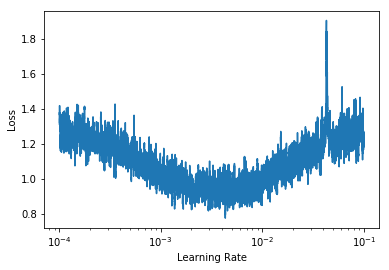

In [92]:
learner.plot_lrs(50)

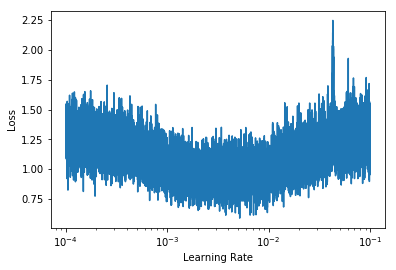

In [93]:
learner.plot_lrs(10)

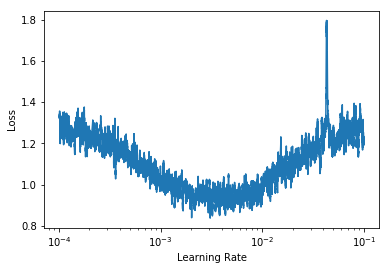

In [94]:
learner.plot_lrs(100)

In [102]:
del cfobj
torch.cuda.empty_cache()

NameError: name 'cfobj' is not defined

In [97]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,user_autoenc_cols,item_autoenc_cols,dropout_e,hidden,dropouts,error_type="mse")
cfobj=cfobj.to(device)

In [132]:
wd

1e-07

In [133]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=3e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=0)

In [134]:
learner.run_epochs(dltrain,dlvalid,5)

Batch:12000 1.041535643506795  
Batch:24000 0.9942184691708535  
Batch:36000 0.9686477350940307  
Batch:48000 0.955178620668749  
Epoch:0 Learning rate 0.003 Weight Decay 1e-07 Train Loss:0.9489582044929812                 Valid Loss:0.8365619436588069 Train RMSE:0.9582070432681895 Valid RMSE:0.8988682037468022 Train MSE:0.9489582044929812 Valid MSE:0.8365619436588069                 Train MAE:0.7788321695492688 Valid MAE:0.7250936683970465
Batch:12000 0.9048486150329311  
Batch:24000 0.9024957619911681  
Batch:36000 0.898447570125262  
Batch:48000 0.8980624209002902  
Epoch:1 Learning rate 0.003 Weight Decay 1e-07 Train Loss:0.8974406362628183                 Valid Loss:0.8315365962119283 Train RMSE:0.9316339928284978 Valid RMSE:0.8966361541250053 Train MSE:0.8974406362628183 Valid MSE:0.8315365962119283                 Train MAE:0.7570095464186224 Valid MAE:0.7264546314236527
Batch:12000 0.8840848305374384  
Batch:24000 0.8863504032591979  
Batch:36000 0.8873803575022353  
Batch:4800

KeyboardInterrupt: 

In [88]:
learner.run_epochs(dltrain,dlvalid,5)

Batch:12000 0.9937722012822827  
Batch:24000 0.9466208930425346  
Batch:36000 0.9257968529880874  
Batch:48000 0.9131020734407939  
Epoch:0 Learning rate 0.003 Weight Decay 1e-07 Train Loss:0.9067523726690055                 Valid Loss:0.8266130926031489 Train RMSE:0.9357230435619861 Valid RMSE:0.8918926140005927 Train MSE:0.9067523726690055 Valid MSE:0.8266130926031489                 Train MAE:0.7591012329536401 Valid MAE:0.7184826666757379
Batch:12000 0.8537703976202756  
Batch:24000 0.8591483798905586  
Batch:36000 0.8603906571676748  
Batch:48000 0.8608978077773937  
Epoch:1 Learning rate 0.003 Weight Decay 1e-07 Train Loss:0.8605700961666496                 Valid Loss:0.8453939872473879 Train RMSE:0.9115031662888465 Valid RMSE:0.905076722549791 Train MSE:0.8605700961666496 Valid MSE:0.8453939872473879                 Train MAE:0.7357545598349783 Valid MAE:0.7409134263641088
Batch:12000 0.8488606558603545  
Batch:24000 0.851816796131432  
Batch:36000 0.8512700904102789  
Batch:480

In [92]:
torch.save(cfobj,f=f'{DATAPATH}/inter/cf_plus_model')
torch.save(learner,f=f'{DATAPATH}/inter/cf_plus_learner')
torch.save(optimizer,f=f'{DATAPATH}/inter/cf_plus_optimizer')
torch.save(cfobj.state_dict(),f'{DATAPATH}/inter/cf_plus_state_dict')
torch.save(optimizer.state_dict(),f'{DATAPATH}/inter/cf_plus_optimizer_state_dict')

/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [95]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=7e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,4000,0.25,cycle_mult=3,start_lr=7e-3,end_lr=5e-4,error_type="mse")

In [96]:
learner.run_epochs(dltrain,dlvalid,34)

Batch:4000 0.9477549085095525  
Batch:8000 0.9465845673978329  
Batch:12000 0.9417663092426956  
Batch:16000 0.9355373664963991  
Batch:20000 0.9328082102537155  
Batch:24000 0.9305484503575912  
Batch:28000 0.9264751869748745  
Batch:32000 0.9242038224684075  
Batch:36000 0.9226649680555694  
Batch:40000 0.9220447807293385  
Batch:44000 0.9201199960126119  
Batch:48000 0.9179695794107392  
Batch:52000 0.917377596736814  
Batch:56000 0.9161965042606794  
Batch:4000 0.8386128387600184  
Epoch:0 Learning rate 0.007 Weight Decay 1e-07 Train Loss:0.9161285537519076                 Valid Loss:0.839683299244251 Train RMSE:0.9406655851615302 Valid RMSE:0.9014863114091172 Train MSE:0.9161285537519076 Valid MSE:0.839683299244251                 Train MAE:0.7602618248253719 Valid MAE:0.7340835974726323
Batch:4000 0.8706246215365827  
Batch:8000 0.8689795228820294  
Batch:12000 0.8630811476695041  
Batch:16000 0.8624211596264504  
Batch:20000 0.8600771689008921  
Batch:24000 0.8593907365746175  


Batch:12000 0.7961130048806468  
Batch:16000 0.7987841129256412  
Batch:20000 0.7984760003037751  
Batch:24000 0.7988762776665389  
Batch:28000 0.7983388448442732  
Batch:32000 0.7987451961673796  
Batch:36000 0.7991053899261686  
Batch:40000 0.7997887085597962  
Batch:44000 0.7993419854817065  
Batch:48000 0.7995108859750132  
Batch:52000 0.7991822568810043  
Batch:56000 0.8002008476668436  
Batch:4000 0.7799512348510325  
Epoch:10 Learning rate 0.0012050711320876154 Weight Decay 1e-07 Train Loss:0.8002595694560909                 Valid Loss:0.7806954427538243 Train RMSE:0.878152008338577 Valid RMSE:0.8665855451820185 Train MSE:0.8002595694560909 Valid MSE:0.7806954427538243                 Train MAE:0.7022202798888065 Valid MAE:0.6882385908031952
Batch:4000 0.7778072071671486  
Batch:8000 0.7878290575034916  
Batch:12000 0.7873326572639247  
Batch:16000 0.7888198718768544  
Batch:20000 0.7886969285290688  
Batch:24000 0.7903713638580715  
Batch:28000 0.7916320689615927  
Batch:32000 

KeyboardInterrupt: 

In [91]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=7e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,4000,0.25,cycle_mult=3,start_lr=7e-3,end_lr=5e-4,error_type="mse")

In [79]:
learner.run_epochs(dltrain,dlvalid,7)

Batch:4000 0.7589641367346048  
Batch:8000 0.7571632760427892  
Batch:12000 0.7582903443252047  
Epoch:0 Learning rate 0.0005 Weight Decay 1e-06 Train Loss:0.757888773687954                 Valid Loss:0.7645808913276048 Train RMSE:0.8664677383832871 Valid RMSE:0.87025126801757 Train MSE:0.757888773687954 Valid MSE:0.7645808913276048                 Train MAE:0.6829513034846999 Valid MAE:0.6842402270110235
Epoch:0 Learning rate 0.0005 Weight Decay 1e-06 Train Loss:0.757888773687954                 Valid Loss:0.7645808913276048 Train RMSE:0.8664677383832871 Valid RMSE:0.87025126801757 Train MSE:0.757888773687954 Valid MSE:0.7645808913276048                 Train MAE:0.6829513034846999 Valid MAE:0.6842402270110235
Batch:4000 0.8245237660706043  
Batch:8000 0.8330039078891277  
Batch:12000 0.8364907086764772  
Epoch:1 Learning rate 0.007 Weight Decay 1e-06 Train Loss:0.8378658421188233                 Valid Loss:0.8286903804109711 Train RMSE:0.9112475754560234 Valid RMSE:0.9067535381525427

In [82]:
wd=1e-7
optimizer=torch.optim.Adam(cfobj.parameters(),lr=7e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,4000,0.25,cycle_mult=2,start_lr=7e-3,end_lr=5e-4,error_type="mse")

In [83]:
learner.run_epochs(dltrain,dlvalid,7)

Batch:4000 0.8521015138998628  
Batch:8000 0.8511567603945732  
Batch:12000 0.8500934970453382  
Epoch:0 Learning rate 0.007 Weight Decay 1e-07 Train Loss:0.8494464754274351                 Valid Loss:0.8367525936317077 Train RMSE:0.9175105304091589 Valid RMSE:0.9112201843895492 Train MSE:0.8494464754274351 Valid MSE:0.8367525936317077                 Train MAE:0.7299445106356713 Valid MAE:0.7351048301979279
Epoch:0 Learning rate 0.007 Weight Decay 1e-07 Train Loss:0.8494464754274351                 Valid Loss:0.8367525936317077 Train RMSE:0.9175105304091589 Valid RMSE:0.9112201843895492 Train MSE:0.8494464754274351 Valid MSE:0.8367525936317077                 Train MAE:0.7299445106356713 Valid MAE:0.7351048301979279
Batch:4000 0.795286576718092  
Batch:8000 0.7928518238961697  
Batch:12000 0.7918042563249668  
Epoch:1 Learning rate 0.0018708286933869708 Weight Decay 1e-07 Train Loss:0.7911140111530723                 Valid Loss:0.7781120661314832 Train RMSE:0.8854427259818367 Valid RM